# Calculation of the divergence of the advection of the perpendicular gradient of the potential times density using Clebsch coordinates

We would here like to calculate
$$
\nabla\cdot\left(\mathbf{u}_E\cdot\nabla\left[n \nabla_\perp\phi \right]\right)
$$
using cylindrical Clebsch coordinates, as this tensor identity has not been found in the literature.

**NOTE: These are normalized equations. As $B$ is constant, we can choose $B_0$ so that the normalized $\tilde{B}=1$, thus, $B$ is excluded from these equations.**

Also, we would like to compare this with
$$
B\{\phi,\Omega^D\}
$$

In [1]:
from IPython.display import display
from sympy import symbols, simplify, sympify, expand
from sympy import init_printing
from sympy import Eq, Function
from clebschVector import ClebschVec
from clebschVector import div, grad, gradPerp, advVec
from common import rho, theta, poisson
from common import displayVec

init_printing()

In [2]:
u_z = symbols('u_z', real = True)
# In reality this is a function, but as it serves only as a dummy it is here defined as a symbol
# This makes it easier to replace
f = symbols('f', real = True)
phi = Function('phi')(rho, theta)
n   = Function('n')(rho, theta)
# Symbols for printing
zeta, chi, epsilon = symbols('zeta, chi, epsilon')

# Calculation of the $E\times B$ advection

We would now like to calculate

$$
\zeta = \nabla\cdot\left(\mathbf{u}_E \cdot\nabla\left[n\nabla_\perp\phi\right]\right)
$$

We will do this by

1. Calculate $n\nabla_\perp\phi$
2. Define $\mathbf{u}_E$
    * By first calculating $\nabla_\perp\phi$
3. Calculate $\mathbf{u}_E\cdot\nabla \left(n\nabla_\perp\phi\right)$
    * To check the different contributions we also
        * Calculate $\mathbf{u}_E\cdot\nabla f$
        * Calculate $\mathbf{a}\cdot \left(n\nabla_\perp\phi\right)$
4. Take the divergence of the resulting vector
5. Compare this with $B\{\phi,\Omega^D\}$

## Calculation of $n\nabla_\perp\phi$

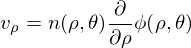

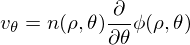

In [3]:
nGradPerpPhi = gradPerp(phi)*n
displayVec(nGradPerpPhi)

## Defining $\mathbf{u}_E$

We have that 
$${u}_E = - \frac{\nabla_\perp\phi\times\mathbf{b}}{B}$$
Remember that we are working with normalized equations, so $B$ (which in reality is $\tilde{B}$) is equal to $1$.

**NOTE: It migth appear that there is a discrepancy between having a coordinate system where $B$ is not constant where we have derived equation where $B$ is constant. However, this is not a problem as $B$ is not present in the normalized equations, and because we can choose $B_0$ so that $\widetilde{B}=1$**

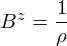

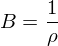

In [4]:
# The basis-vectors are contravariant => components are covariant
eTheta = ClebschVec(rho=0, theta=1, z=0, covariant=True)
eRho = ClebschVec(rho=1, theta=0, z=0, covariant=True)
B = eTheta^eRho
displayVec(B, 'B')
Blen = B.len()
display(Eq(symbols('B'), Blen))
b = B/(B.len())
displayVec(b, 'b')

**NOTE: Basis vectors in $B$ are covariant, so components are contravariant**

### Calculation of $\nabla_\perp\phi$

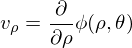

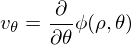

In [5]:
gradPerpPhi = gradPerp(phi)
displayVec(gradPerpPhi)

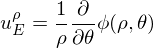

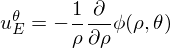

In [6]:
# Normalized B
BTilde = 1

# Defining u_E
ue = - ((gradPerpPhi^b)/BTilde)
displayVec(ue, 'u_E')

## Calculation of $\mathbf{u}_E\cdot\nabla \left(n\nabla_\perp\phi\right)$

### Calculation of $\mathbf{u}_E\cdot\nabla f$

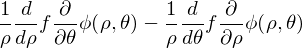

In [7]:
ueDotGrad_f = ue*grad(f)
display(ueDotGrad_f)

### Calculation of  $\mathbf{a}\cdot\nabla \left(n\nabla_\perp\phi\right)$

In [8]:
aRho,  aZ,  aTheta  = symbols('a^rho, a^z, a^theta')
a_Rho, a_Z, a_Theta = symbols('a_rho, a_z, a_theta')
aCov = ClebschVec(rho = a_Rho, z=a_Z, theta = a_Theta, covariant=True)
aCon = ClebschVec(rho = aRho,  z=aZ,  theta = aTheta,  covariant=False)

Using covariant vector

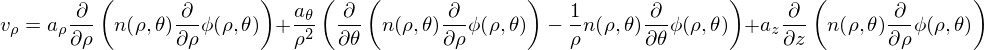

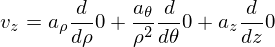

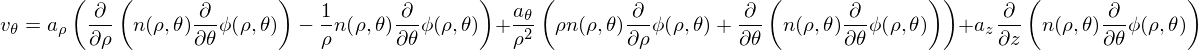

In [9]:
aCovDotNablaGradPhi = advVec(aCov, nGradPerpPhi)
displayVec(aCovDotNablaGradPhi)

Using contravariant vector

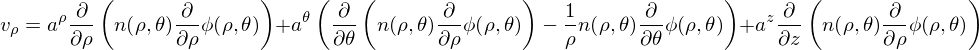

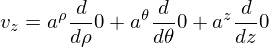

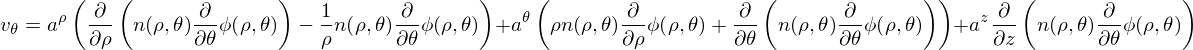

In [10]:
aConDotNablaGradPhi = advVec(aCon, nGradPerpPhi)
displayVec(aConDotNablaGradPhi)

### Calculation of full  $\mathbf{u}_E\cdot\nabla \left(n\nabla_\perp\phi\right)$

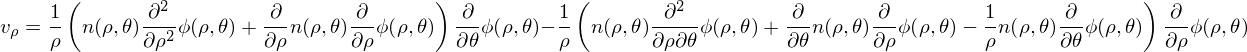

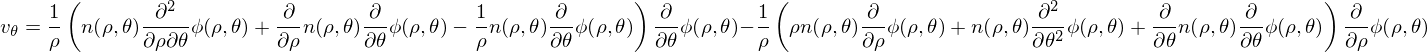

In [11]:
ueDotGradnGradPerpPhi = advVec(ue, nGradPerpPhi)
displayVec(ueDotGradnGradPerpPhi.doitVec())

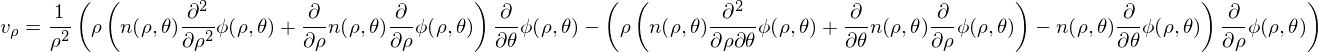

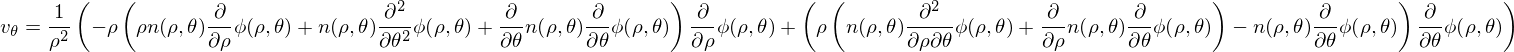

In [12]:
displayVec(ueDotGradnGradPerpPhi.doitVec().simplifyVec())

## Calculation of $\nabla\cdot\left(\mathbf{u}_E\cdot\nabla\left[n\nabla_\perp\phi\right]\right)$

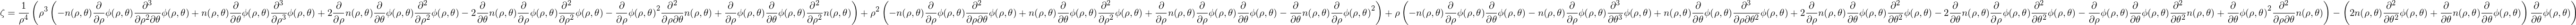

In [13]:
div_ueDotGradnGradPerpPhi = div(ueDotGradnGradPerpPhi)
zetaFunc = div_ueDotGradnGradPerpPhi.doit().expand()
display(Eq(zeta, simplify(zetaFunc)))

# Comparison with $B\{\phi,\Omega^D\}$

In cylindrical Clebsch coordinates, we have that $\mathbf{u}_E\cdot\nabla = \{\phi,\cdot\}$. However, we have normalized our equations so that $\tilde{B}=1$. As $B$ from the Clebsch system is not constant, we can achieve normalization by multiplying the Poisson bracket with the un-normalized $B$ (from the Clebsch system).

We define the vorticity-like field $\Omega^D$ to be $\Omega^D = \nabla\cdot\left(n\nabla_\perp\phi\right)$. In the Clebsch system this is written as

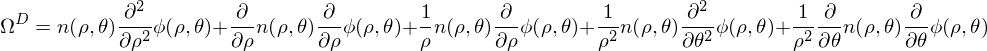

In [14]:
vortD = div(gradPerp(phi)*n)
display(Eq(symbols('Omega^D'), vortD.doit().expand()))

We now write $\chi = B\{\phi,\Omega^D\}$

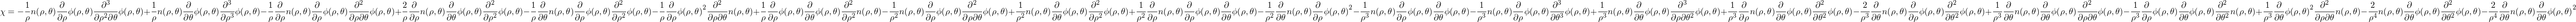

In [15]:
poissonPhiVortD = Blen*poisson(phi, vortD)
chiFunc = poissonPhiVortD.doit().expand()
display(Eq(chi, chiFunc))

The difference $\epsilon$ between $\zeta = \nabla\cdot\left(\mathbf{u}_E\cdot\nabla\left[n\nabla_\perp\phi\right]\right)$ and $\chi = B\{\phi,\Omega^D\}$ is given by

$$\epsilon = \zeta - \chi$$

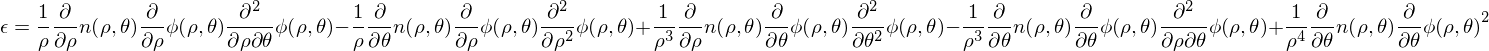

In [16]:
epsilonFunc = (zetaFunc - chiFunc).expand()
display(Eq(epsilon, epsilonFunc))

In fact we see that

\begin{align*}
  \epsilon 
  - \left(
      -\frac{1}{\rho}[\partial_\rho\phi]\{n, \partial_\rho\phi\}
      -\frac{1}{\rho^3}[\partial_\theta\phi]\{n, \partial_\theta\phi\}
      +\frac{1}{\rho^4}[\partial_\theta n][\partial_\theta\phi]^2
    \right)
    =\\
  \epsilon 
  - \left(
      \frac{1}{\rho}[\partial_\rho\phi]\{\partial_\rho\phi,n\}
      +\frac{1}{\rho^3}[\partial_\theta\phi]\{\partial_\theta\phi, n\}
      +\frac{1}{\rho^4}[\partial_\theta n][\partial_\theta\phi]^2
    \right)
    =    
\end{align*}

In [17]:
epsMinusCorrection = epsilonFunc\
       -\
       (\
        (1/rho)*phi.diff(rho)*poisson(phi.diff(rho), n)\
       +(1/(rho)**3)*phi.diff(theta)*poisson(phi.diff(theta),n)\
       +(1/(rho)**4)*n.diff(theta)*(phi.diff(theta))**2
       )
        
display(epsMinusCorrection.simplify())

What is more interesting is in fact that

\begin{align*}
  \epsilon 
  - \frac{B}{2}\{\mathbf{u}_E\cdot\mathbf{u}_E, n\}
    =
\end{align*}

In [18]:
epsMinusNewCorr = epsilonFunc - (Blen/2)*poisson(ue*ue, n).doit()

display(epsMinusNewCorr.simplify())

Where
\begin{align*}
  \mathbf{u}_E\cdot\mathbf{u}_E
  =
\end{align*}

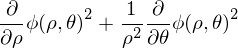

In [19]:
display((ue*ue).doit())

## Printing for comparison

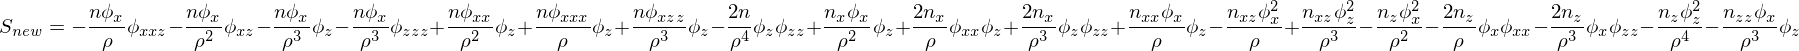

In [20]:
S = expand(zetaFunc)

strS = str(S)

# phi rho derivatives
strS = strS.replace('Derivative(phi(rho, theta), rho)', 'phi_x')
strS = strS.replace('Derivative(phi(rho, theta), rho, rho)', 'phi_xx')
strS = strS.replace('Derivative(phi(rho, theta), rho, rho, rho)', 'phi_xxx')
# phi theta derivatives
strS = strS.replace('Derivative(phi(rho, theta), theta)', 'phi_z')
strS = strS.replace('Derivative(phi(rho, theta), theta, theta)', 'phi_zz')
strS = strS.replace('Derivative(phi(rho, theta), theta, theta, theta)', 'phi_zzz')
# phi mixed derivatives
strS = strS.replace('Derivative(phi(rho, theta), rho, theta)', 'phi_xz')
strS = strS.replace('Derivative(phi(rho, theta), rho, theta, theta)', 'phi_xzz')
strS = strS.replace('Derivative(phi(rho, theta), rho, rho, theta)', 'phi_xxz')
# Non-derivatives
strS = strS.replace('phi(rho, theta)', 'phi')


# n rho derivatives
strS = strS.replace('Derivative(n(rho, theta), rho)', 'n_x')
strS = strS.replace('Derivative(n(rho, theta), rho, rho)', 'n_xx')
# n theta derivatives
strS = strS.replace('Derivative(n(rho, theta), theta)', 'n_z')
strS = strS.replace('Derivative(n(rho, theta), theta, theta)', 'n_zz')
# n mixed derivatives
strS = strS.replace('Derivative(n(rho, theta), rho, theta)', 'n_xz')
# Non-derivatives
strS = strS.replace('n(rho, theta)', 'n')

newS = sympify(strS)
display(Eq(symbols('S_new'), expand(newS)))